#                                  Multi Label Clasification - 1D

# Load Data

In [1]:
import pandas as pd

In [91]:
root_folder = 'multi-label-clasification/one-d/'
file_name = "diabetes_dataset"
df = pd.read_csv('sample_data/'+file_name+'.csv')

#buang kolom tidak dibutuhkan
df.drop(columns=['diagnosed_diabetes'], inplace=True)

print("Sebulum DROP nan : " + str(df.shape) )
df = df.dropna() #Drop Nan
print("Setelah DROP nan : " + str(df.shape) )

Sebulum DROP nan : (100000, 30)
Setelah DROP nan : (100000, 30)


In [92]:
df.head()

,age,gender,ethnicity,education_level,income_level,employment_status,smoking_status,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,...,cholesterol_total,hdl_cholesterol,ldl_cholesterol,triglycerides,glucose_fasting,glucose_postprandial,insulin_level,hba1c,diabetes_risk_score,diabetes_stage
0,58,Male,Asian,Highschool,Lower-Middle,Employed,Never,0,215,5.7,...,239,41,160,145,136,236,6.36,8.18,29.6,Type 2
1,48,Female,White,Highschool,Middle,Employed,Former,1,143,6.7,...,116,55,50,30,93,150,2.00,5.63,23.0,No Diabetes
2,60,Male,Hispanic,Highschool,Middle,Unemployed,Never,1,57,6.4,...,213,66,99,36,118,195,5.07,7.51,44.7,Type 2
3,74,Female,Black,Highschool,Low,Retired,Never,0,49,3.4,...,171,50,79,140,139,253,5.28,9.03,38.2,Type 2
4,46,Male,White,Graduate,Middle,Retired,Never,1,109,7.2,...,210,52,125,160,137,184,12.74,7.20,23.5,Type 2


#### LabelEncoder

In [93]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
#labeling
df['label_gender']            = le.fit_transform(df['gender'])
df['label_ethnicity']         = le.fit_transform(df['ethnicity'])
df['label_income_level']      = le.fit_transform(df['income_level'])
df['label_education_level']   = le.fit_transform(df['education_level'])
df['label_employment_status'] = le.fit_transform(df['employment_status'])
df['label_smoking_status']    = le.fit_transform(df['smoking_status'])

In [94]:
df.head()

,age,gender,ethnicity,education_level,income_level,employment_status,smoking_status,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,...,insulin_level,hba1c,diabetes_risk_score,diabetes_stage,label_gender,label_ethnicity,label_income_level,label_education_level,label_employment_status,label_smoking_status
0,58,Male,Asian,Highschool,Lower-Middle,Employed,Never,0,215,5.7,...,6.36,8.18,29.6,Type 2,1,0,2,1,0,2
1,48,Female,White,Highschool,Middle,Employed,Former,1,143,6.7,...,2.00,5.63,23.0,No Diabetes,0,4,3,1,0,1
2,60,Male,Hispanic,Highschool,Middle,Unemployed,Never,1,57,6.4,...,5.07,7.51,44.7,Type 2,1,2,3,1,3,2
3,74,Female,Black,Highschool,Low,Retired,Never,0,49,3.4,...,5.28,9.03,38.2,Type 2,0,1,1,1,1,2
4,46,Male,White,Graduate,Middle,Retired,Never,1,109,7.2,...,12.74,7.20,23.5,Type 2,1,4,3,0,1,2


#### Scaler

In [95]:
from sklearn.preprocessing import MinMaxScaler
import joblib

# Contoh: buat dan fit scaler
scaler = MinMaxScaler()
cols = [
    'label_gender', 
    'label_ethnicity', 
    'label_income_level',
    'label_education_level',
    'label_employment_status', 
    'label_smoking_status',
    #--------------------------
    'age',
    'physical_activity_minutes_per_week',
    'diet_score',
    'sleep_hours_per_day',
    'glucose_postprandial',
    'insulin_level',
    'hba1c',
    'diabetes_risk_score'
]
df[cols] = scaler.fit_transform(df[cols])


# Simpan scaler
joblib.dump(scaler, root_folder + 'scaler.pkl')
print("Scaler saved!")


Scaler saved!


In [96]:
df.head()

,age,gender,ethnicity,education_level,income_level,employment_status,smoking_status,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,...,insulin_level,hba1c,diabetes_risk_score,diabetes_stage,label_gender,label_ethnicity,label_income_level,label_education_level,label_employment_status,label_smoking_status
0,0.555556,Male,Asian,Highschool,Lower-Middle,Employed,Never,0,0.258103,0.57,...,0.144275,0.720690,0.417054,Type 2,0.5,0.00,0.50,0.333333,0.000000,1.0
1,0.416667,Female,White,Highschool,Middle,Employed,Former,1,0.171669,0.67,...,0.000000,0.281034,0.314729,No Diabetes,0.0,1.00,0.75,0.333333,0.000000,0.5
2,0.583333,Male,Hispanic,Highschool,Middle,Unemployed,Never,1,0.068427,0.64,...,0.101588,0.605172,0.651163,Type 2,0.5,0.50,0.75,0.333333,1.000000,1.0
3,0.777778,Female,Black,Highschool,Low,Retired,Never,0,0.058824,0.34,...,0.108537,0.867241,0.550388,Type 2,0.0,0.25,0.25,0.333333,0.333333,1.0
4,0.388889,Male,White,Graduate,Middle,Retired,Never,1,0.130852,0.72,...,0.355394,0.551724,0.322481,Type 2,0.5,1.00,0.75,0.000000,0.333333,1.0


#### Mapping label

In [97]:
import json
mapping_dicts = {}

cols = [
    'gender',
    'ethnicity',
    'education_level',
    'income_level',
    'employment_status',
    'smoking_status'
]

for col in cols:
    label_col = f"label_{col}"
    mapping_dicts[col] = dict(zip(df[col], df[label_col]))


with open(root_folder + 'label_mappings.json', 'w') as f:
    json.dump(mapping_dicts, f, indent=2)

rows = []
for col, mapping in mapping_dicts.items():
    for k, v in mapping.items():
        rows.append({'feature': col, 'original_value': k, 'label_value': v})

mapping_table = pd.DataFrame(rows)
print(mapping_table)

              feature original_value  label_value
0              gender           Male     0.500000
1              gender         Female     0.000000
2              gender          Other     1.000000
3           ethnicity          Asian     0.000000
4           ethnicity          White     1.000000
5           ethnicity       Hispanic     0.500000
6           ethnicity          Black     0.250000
7           ethnicity          Other     0.750000
8     education_level     Highschool     0.333333
9     education_level       Graduate     0.000000
10    education_level   Postgraduate     1.000000
11    education_level      No formal     0.666667
12       income_level   Lower-Middle     0.500000
13       income_level         Middle     0.750000
14       income_level            Low     0.250000
15       income_level   Upper-Middle     1.000000
16       income_level           High     0.000000
17  employment_status       Employed     0.000000
18  employment_status     Unemployed     1.000000


#### Select Kolom To Trian

In [98]:
cols = [
    'label_gender', 
    #'label_ethnicity', 
    #'label_income_level',
    #'label_education_level',
    #'label_employment_status', 
    'label_smoking_status',
    #--------------------------
    'age',
    'physical_activity_minutes_per_week',
    'diet_score',
    'sleep_hours_per_day',
    'glucose_postprandial',
    'insulin_level',
    'hba1c',
    'diabetes_risk_score',
    #------------------------
    'diabetes_stage'
]
df = df[cols].copy()

In [99]:
df.head()

,label_gender,label_smoking_status,age,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,glucose_postprandial,insulin_level,hba1c,diabetes_risk_score,diabetes_stage
0,0.5,1.0,0.555556,0.258103,0.57,0.700000,0.764977,0.144275,0.720690,0.417054,Type 2
1,0.0,0.5,0.416667,0.171669,0.67,0.500000,0.368664,0.000000,0.281034,0.314729,No Diabetes
2,0.5,1.0,0.583333,0.068427,0.64,1.000000,0.576037,0.101588,0.605172,0.651163,Type 2
3,0.0,1.0,0.777778,0.058824,0.34,0.514286,0.843318,0.108537,0.867241,0.550388,Type 2
4,0.5,1.0,0.388889,0.130852,0.72,0.628571,0.525346,0.355394,0.551724,0.322481,Type 2


#### cek keseimbangan data

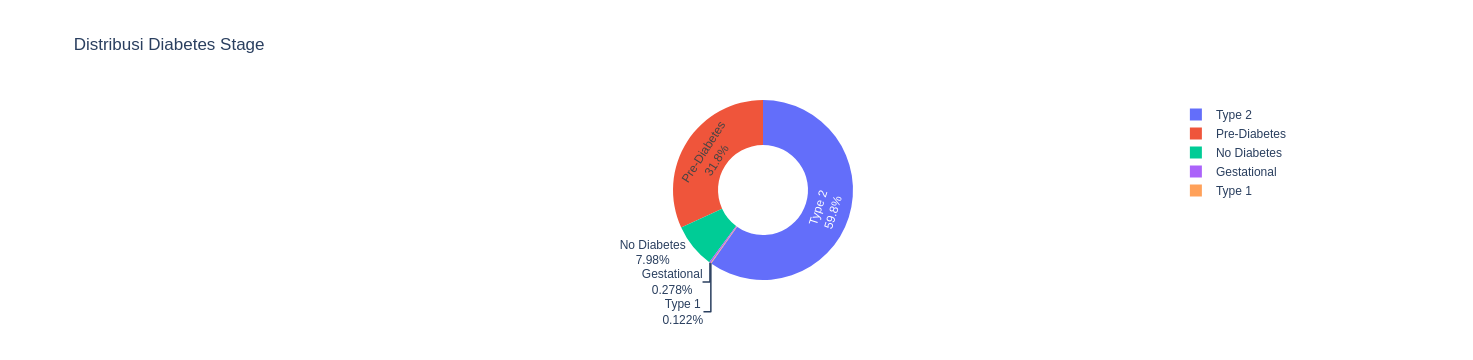

In [100]:
import plotly.express as px

fig = px.pie(
    df,
    names='diabetes_stage',
    hole=0.5,  # membuatnya jadi donat
    title='Distribusi Diabetes Stage',
)
fig.update_traces(textinfo='percent+label')
fig.show()

#### Tentukan target -> one-hot encoding

In [101]:
y_counts = df['diabetes_stage'].value_counts(normalize=True)
labels = list(y_counts.index)

df_y_encoded = pd.get_dummies(df['diabetes_stage'], prefix='y')

# Pastikan semua nama kolom lowercase dan spasi → underscore
df_y_encoded.columns = (
    df_y_encoded.columns.str.lower()
                        .str.replace(' ', '_')
)

# Gabungkan ke DataFrame utama
df = pd.concat([df.drop('diabetes_stage', axis=1), df_y_encoded.astype(int)], axis=1)

In [102]:
df.head()

,label_gender,label_smoking_status,age,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,glucose_postprandial,insulin_level,hba1c,diabetes_risk_score,y_gestational,y_no_diabetes,y_pre-diabetes,y_type_1,y_type_2
0,0.5,1.0,0.555556,0.258103,0.57,0.700000,0.764977,0.144275,0.720690,0.417054,0,0,0,0,1
1,0.0,0.5,0.416667,0.171669,0.67,0.500000,0.368664,0.000000,0.281034,0.314729,0,1,0,0,0
2,0.5,1.0,0.583333,0.068427,0.64,1.000000,0.576037,0.101588,0.605172,0.651163,0,0,0,0,1
3,0.0,1.0,0.777778,0.058824,0.34,0.514286,0.843318,0.108537,0.867241,0.550388,0,0,0,0,1
4,0.5,1.0,0.388889,0.130852,0.72,0.628571,0.525346,0.355394,0.551724,0.322481,0,0,0,0,1


# Data Load To Train

#### Split data

In [103]:
import torch
from torch.utils.data import DataLoader, Dataset
from sklearn.model_selection import train_test_split
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Misal df sudah berisi semua data
# Pisahkan fitur dan target
feature_cols = [col for col in df.columns if not col.startswith('y_')]
target_cols = [col for col in df.columns if col.startswith('y_')]

# Pisahkan train-test (stratify opsional jika masih punya kolom 'diabetes_stage')
X_train, X_test = train_test_split(df, test_size=0.2, random_state=42, shuffle=True)


#### DataLoader

In [104]:
from data_set import MultiLabel1DDataset

# Buat dataset dengan class kamu
train_dataset = MultiLabel1DDataset(X_train, feature_cols, target_cols, normalize=False)
test_dataset  = MultiLabel1DDataset(X_test, feature_cols, target_cols, normalize=False)

# Buat DataLoader
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader  = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Cek contoh batch
for X, y in train_loader:
    print("X shape:", X.shape)
    print("y shape:", y.shape)
    print(X[:3])  # contoh fitur
    print(y[:3])  # contoh label
    break

X shape: torch.Size([32, 10])
y shape: torch.Size([32, 5])
tensor([[0.0000, 0.0000, 0.5972, 0.0288, 0.5800, 0.5143, 0.6037, 0.2915, 0.5276,
         0.4837],
        [0.0000, 1.0000, 0.5556, 0.0804, 0.5300, 0.7857, 0.2857, 0.3915, 0.3207,
         0.4310],
        [0.5000, 1.0000, 0.7639, 0.1176, 0.4000, 0.5429, 0.4885, 0.0000, 0.4828,
         0.5411]])
tensor([[0., 0., 0., 0., 1.],
        [0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 1.]])


# Config

In [105]:
from jcopdl.callback import Callback, set_config

config = set_config({
    "labels"         : labels,
    "threshold"      : 0.5,
    "input_dim"      : len(test_dataset.X[0]),
    "hidden_dims"    : [ 8],
    "output_dim"     : len(labels),
    "dropout"        : 0.1,
    "activation"     : "relu",
    "early_stop_patience" : 5
})
config

Config(activation=relu, dropout=0.1, early_stop_patience=5, hidden_dims=[8], input_dim=10, labels=['Type 2', 'Pre-Diabetes', 'No Diabetes', 'Gestational', 'Type 1'], output_dim=5, threshold=0.5)

# MCOC

#### Model - Criterion - Optimizer - Callback

In [106]:
from class_lib import MultiLabel1DClassifier
from torch import optim, nn
from jcopdl.callback import Callback

#Model
model = MultiLabel1DClassifier(input_dim=config.input_dim, hidden_dims=config.hidden_dims, output_dim=config.output_dim, dropout=config.dropout, activation=config.activation).to(device)

#Criterion
criterion = nn.BCELoss()

#Optimizer
optim = optim.AdamW(model.parameters(), lr=0.001)

#Callback
callback = Callback(model, config, outdir=root_folder,early_stop_patience=config.early_stop_patience)

# Training


test: 100%|██████████| 625/625 [00:00<00:00, 2098.21it/s]


           📊 Epoch Summary             Per-Label Accuracy 
┏━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━┳━━━━━━━━━━┓
┃ Metric           ┃  Train ┃   Test ┃ ┃ Label ┃ Accuracy ┃
┡━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━╇━━━━━━━━━━┩
│ Loss             │ 0.2982 │ 0.2193 │ │   1   │  0.9971  │
│ Hamming Loss     │ 0.1422 │ 0.1149 │ │   2   │  0.9268  │
│ Subset Accuracy  │ 0.5809 │ 0.6290 │ │   3   │  0.6706  │
│ Micro F1         │ 0.6261 │ 0.6891 │ │   4   │  0.9988  │
│ Macro F1         │ 0.2092 │ 0.2825 │ │   5   │  0.8319  │
│ Overall Accuracy │ 0.8578 │ 0.8851 │ └───────┴──────────┘
└──────────────────┴────────┴────────┘


Epoch     1
Train_cost  = 0.2982 | Test_cost  = 0.2193 | Train_score = 0.8578 | Test_score = 0.8851 |


test: 100%|██████████| 625/625 [00:00<00:00, 2008.95it/s]


           📊 Epoch Summary             Per-Label Accuracy 
┏━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━┳━━━━━━━━━━┓
┃ Metric           ┃  Train ┃   Test ┃ ┃ Label ┃ Accuracy ┃
┡━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━╇━━━━━━━━━━┩
│ Loss             │ 0.2154 │ 0.1979 │ │   1   │  0.9971  │
│ Hamming Loss     │ 0.1097 │ 0.1036 │ │   2   │  0.9343  │
│ Subset Accuracy  │ 0.6473 │ 0.6676 │ │   3   │  0.7037  │
│ Micro F1         │ 0.7105 │ 0.7279 │ │   4   │  0.9988  │
│ Macro F1         │ 0.3344 │ 0.3524 │ │   5   │  0.8478  │
│ Overall Accuracy │ 0.8903 │ 0.8964 │ └───────┴──────────┘
└──────────────────┴────────┴────────┘


Epoch     2
Train_cost  = 0.2154 | Test_cost  = 0.1979 | Train_score = 0.8903 | Test_score = 0.8964 |


test: 100%|██████████| 625/625 [00:00<00:00, 1817.00it/s]


           📊 Epoch Summary             Per-Label Accuracy 
┏━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━┳━━━━━━━━━━┓
┃ Metric           ┃  Train ┃   Test ┃ ┃ Label ┃ Accuracy ┃
┡━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━╇━━━━━━━━━━┩
│ Loss             │ 0.1992 │ 0.1853 │ │   1   │  0.9971  │
│ Hamming Loss     │ 0.0992 │ 0.0884 │ │   2   │  0.9358  │
│ Subset Accuracy  │ 0.6887 │ 0.7429 │ │   3   │  0.7635  │
│ Micro F1         │ 0.7456 │ 0.7777 │ │   4   │  0.9988  │
│ Macro F1         │ 0.3767 │ 0.3955 │ │   5   │  0.8627  │
│ Overall Accuracy │ 0.9008 │ 0.9116 │ └───────┴──────────┘
└──────────────────┴────────┴────────┘


Epoch     3
Train_cost  = 0.1992 | Test_cost  = 0.1853 | Train_score = 0.9008 | Test_score = 0.9116 |


test: 100%|██████████| 625/625 [00:00<00:00, 1964.41it/s]


           📊 Epoch Summary             Per-Label Accuracy 
┏━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━┳━━━━━━━━━━┓
┃ Metric           ┃  Train ┃   Test ┃ ┃ Label ┃ Accuracy ┃
┡━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━╇━━━━━━━━━━┩
│ Loss             │ 0.1889 │ 0.1762 │ │   1   │  0.9971  │
│ Hamming Loss     │ 0.0910 │ 0.0842 │ │   2   │  0.9385  │
│ Subset Accuracy  │ 0.7265 │ 0.7532 │ │   3   │  0.7742  │
│ Micro F1         │ 0.7725 │ 0.7902 │ │   4   │  0.9988  │
│ Macro F1         │ 0.3987 │ 0.4149 │ │   5   │  0.8707  │
│ Overall Accuracy │ 0.9090 │ 0.9159 │ └───────┴──────────┘
└──────────────────┴────────┴────────┘


Epoch     4
Train_cost  = 0.1889 | Test_cost  = 0.1762 | Train_score = 0.9090 | Test_score = 0.9159 |


test: 100%|██████████| 625/625 [00:00<00:00, 1889.59it/s]


           📊 Epoch Summary             Per-Label Accuracy 
┏━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━┳━━━━━━━━━━┓
┃ Metric           ┃  Train ┃   Test ┃ ┃ Label ┃ Accuracy ┃
┡━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━╇━━━━━━━━━━┩
│ Loss             │ 0.1801 │ 0.1687 │ │   1   │  0.9971  │
│ Hamming Loss     │ 0.0848 │ 0.0780 │ │   2   │  0.9393  │
│ Subset Accuracy  │ 0.7532 │ 0.7826 │ │   3   │  0.7974  │
│ Micro F1         │ 0.7911 │ 0.8078 │ │   4   │  0.9988  │
│ Macro F1         │ 0.4128 │ 0.4255 │ │   5   │  0.8772  │
│ Overall Accuracy │ 0.9152 │ 0.9220 │ └───────┴──────────┘
└──────────────────┴────────┴────────┘


Epoch     5
Train_cost  = 0.1801 | Test_cost  = 0.1687 | Train_score = 0.9152 | Test_score = 0.9220 |


test: 100%|██████████| 625/625 [00:00<00:00, 1927.94it/s]


           📊 Epoch Summary             Per-Label Accuracy 
┏━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━┳━━━━━━━━━━┓
┃ Metric           ┃  Train ┃   Test ┃ ┃ Label ┃ Accuracy ┃
┡━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━╇━━━━━━━━━━┩
│ Loss             │ 0.1732 │ 0.1630 │ │   1   │  0.9971  │
│ Hamming Loss     │ 0.0786 │ 0.0759 │ │   2   │  0.9398  │
│ Subset Accuracy  │ 0.7801 │ 0.7962 │ │   3   │  0.8105  │
│ Micro F1         │ 0.8058 │ 0.8122 │ │   4   │  0.9988  │
│ Macro F1         │ 0.4234 │ 0.4282 │ │   5   │  0.8744  │
│ Overall Accuracy │ 0.9214 │ 0.9241 │ └───────┴──────────┘
└──────────────────┴────────┴────────┘


Epoch     6
Train_cost  = 0.1732 | Test_cost  = 0.1630 | Train_score = 0.9214 | Test_score = 0.9241 |


test: 100%|██████████| 625/625 [00:00<00:00, 1972.68it/s]


           📊 Epoch Summary             Per-Label Accuracy 
┏━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━┳━━━━━━━━━━┓
┃ Metric           ┃  Train ┃   Test ┃ ┃ Label ┃ Accuracy ┃
┡━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━╇━━━━━━━━━━┩
│ Loss             │ 0.1671 │ 0.1582 │ │   1   │  0.9971  │
│ Hamming Loss     │ 0.0739 │ 0.0683 │ │   2   │  0.9399  │
│ Subset Accuracy  │ 0.8003 │ 0.8190 │ │   3   │  0.8401  │
│ Micro F1         │ 0.8163 │ 0.8287 │ │   4   │  0.9988  │
│ Macro F1         │ 0.4337 │ 0.4399 │ │   5   │  0.8825  │
│ Overall Accuracy │ 0.9261 │ 0.9317 │ └───────┴──────────┘
└──────────────────┴────────┴────────┘


Epoch     7
Train_cost  = 0.1671 | Test_cost  = 0.1582 | Train_score = 0.9261 | Test_score = 0.9317 |


test: 100%|██████████| 625/625 [00:00<00:00, 2042.08it/s]


           📊 Epoch Summary             Per-Label Accuracy 
┏━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━┳━━━━━━━━━━┓
┃ Metric           ┃  Train ┃   Test ┃ ┃ Label ┃ Accuracy ┃
┡━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━╇━━━━━━━━━━┩
│ Loss             │ 0.1624 │ 0.1543 │ │   1   │  0.9971  │
│ Hamming Loss     │ 0.0706 │ 0.0671 │ │   2   │  0.9438  │
│ Subset Accuracy  │ 0.8081 │ 0.8165 │ │   3   │  0.8440  │
│ Micro F1         │ 0.8225 │ 0.8298 │ │   4   │  0.9988  │
│ Macro F1         │ 0.4382 │ 0.4535 │ │   5   │  0.8806  │
│ Overall Accuracy │ 0.9294 │ 0.9329 │ └───────┴──────────┘
└──────────────────┴────────┴────────┘


Epoch     8
Train_cost  = 0.1624 | Test_cost  = 0.1543 | Train_score = 0.9294 | Test_score = 0.9329 |


test: 100%|██████████| 625/625 [00:00<00:00, 2028.08it/s]


           📊 Epoch Summary             Per-Label Accuracy 
┏━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━┳━━━━━━━━━━┓
┃ Metric           ┃  Train ┃   Test ┃ ┃ Label ┃ Accuracy ┃
┡━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━╇━━━━━━━━━━┩
│ Loss             │ 0.1588 │ 0.1514 │ │   1   │  0.9971  │
│ Hamming Loss     │ 0.0688 │ 0.0623 │ │   2   │  0.9419  │
│ Subset Accuracy  │ 0.8074 │ 0.8231 │ │   3   │  0.8592  │
│ Micro F1         │ 0.8260 │ 0.8415 │ │   4   │  0.9988  │
│ Macro F1         │ 0.4435 │ 0.4556 │ │   5   │  0.8914  │
│ Overall Accuracy │ 0.9312 │ 0.9377 │ └───────┴──────────┘
└──────────────────┴────────┴────────┘


Epoch     9
Train_cost  = 0.1588 | Test_cost  = 0.1514 | Train_score = 0.9312 | Test_score = 0.9377 |


test: 100%|██████████| 625/625 [00:00<00:00, 1739.18it/s]


           📊 Epoch Summary             Per-Label Accuracy 
┏━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━┳━━━━━━━━━━┓
┃ Metric           ┃  Train ┃   Test ┃ ┃ Label ┃ Accuracy ┃
┡━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━╇━━━━━━━━━━┩
│ Loss             │ 0.1549 │ 0.1473 │ │   1   │  0.9971  │
│ Hamming Loss     │ 0.0671 │ 0.0636 │ │   2   │  0.9428  │
│ Subset Accuracy  │ 0.8103 │ 0.8231 │ │   3   │  0.8541  │
│ Micro F1         │ 0.8300 │ 0.8385 │ │   4   │  0.9988  │
│ Macro F1         │ 0.4463 │ 0.4551 │ │   5   │  0.8890  │
│ Overall Accuracy │ 0.9329 │ 0.9364 │ └───────┴──────────┘
└──────────────────┴────────┴────────┘


Epoch    10
Train_cost  = 0.1549 | Test_cost  = 0.1473 | Train_score = 0.9329 | Test_score = 0.9364 |
==> EarlyStop patience =  1 | Best test_score: 0.9377


test: 100%|██████████| 625/625 [00:00<00:00, 1981.59it/s]


           📊 Epoch Summary             Per-Label Accuracy 
┏━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━┳━━━━━━━━━━┓
┃ Metric           ┃  Train ┃   Test ┃ ┃ Label ┃ Accuracy ┃
┡━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━╇━━━━━━━━━━┩
│ Loss             │ 0.1527 │ 0.1458 │ │   1   │  0.9971  │
│ Hamming Loss     │ 0.0663 │ 0.0645 │ │   2   │  0.9429  │
│ Subset Accuracy  │ 0.8122 │ 0.8237 │ │   3   │  0.8518  │
│ Micro F1         │ 0.8318 │ 0.8369 │ │   4   │  0.9988  │
│ Macro F1         │ 0.4472 │ 0.4547 │ │   5   │  0.8865  │
│ Overall Accuracy │ 0.9337 │ 0.9355 │ └───────┴──────────┘
└──────────────────┴────────┴────────┘


Epoch    11
Train_cost  = 0.1527 | Test_cost  = 0.1458 | Train_score = 0.9337 | Test_score = 0.9355 |
==> EarlyStop patience =  2 | Best test_score: 0.9377


test: 100%|██████████| 625/625 [00:00<00:00, 1945.65it/s]


           📊 Epoch Summary             Per-Label Accuracy 
┏━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━┳━━━━━━━━━━┓
┃ Metric           ┃  Train ┃   Test ┃ ┃ Label ┃ Accuracy ┃
┡━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━╇━━━━━━━━━━┩
│ Loss             │ 0.1502 │ 0.1447 │ │   1   │  0.9971  │
│ Hamming Loss     │ 0.0654 │ 0.0636 │ │   2   │  0.9443  │
│ Subset Accuracy  │ 0.8153 │ 0.8222 │ │   3   │  0.8542  │
│ Micro F1         │ 0.8342 │ 0.8386 │ │   4   │  0.9988  │
│ Macro F1         │ 0.4495 │ 0.4583 │ │   5   │  0.8876  │
│ Overall Accuracy │ 0.9346 │ 0.9364 │ └───────┴──────────┘
└──────────────────┴────────┴────────┘


Epoch    12
Train_cost  = 0.1502 | Test_cost  = 0.1447 | Train_score = 0.9346 | Test_score = 0.9364 |
==> EarlyStop patience =  3 | Best test_score: 0.9377


test: 100%|██████████| 625/625 [00:00<00:00, 1938.64it/s]


           📊 Epoch Summary             Per-Label Accuracy 
┏━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━┳━━━━━━━━━━┓
┃ Metric           ┃  Train ┃   Test ┃ ┃ Label ┃ Accuracy ┃
┡━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━╇━━━━━━━━━━┩
│ Loss             │ 0.1492 │ 0.1426 │ │   1   │  0.9971  │
│ Hamming Loss     │ 0.0644 │ 0.0612 │ │   2   │  0.9448  │
│ Subset Accuracy  │ 0.8177 │ 0.8333 │ │   3   │  0.8581  │
│ Micro F1         │ 0.8366 │ 0.8452 │ │   4   │  0.9988  │
│ Macro F1         │ 0.4522 │ 0.4632 │ │   5   │  0.8951  │
│ Overall Accuracy │ 0.9356 │ 0.9388 │ └───────┴──────────┘
└──────────────────┴────────┴────────┘


Epoch    13
Train_cost  = 0.1492 | Test_cost  = 0.1426 | Train_score = 0.9356 | Test_score = 0.9388 |


test: 100%|██████████| 625/625 [00:00<00:00, 1775.03it/s]


           📊 Epoch Summary             Per-Label Accuracy 
┏━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━┳━━━━━━━━━━┓
┃ Metric           ┃  Train ┃   Test ┃ ┃ Label ┃ Accuracy ┃
┡━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━╇━━━━━━━━━━┩
│ Loss             │ 0.1478 │ 0.1417 │ │   1   │  0.9971  │
│ Hamming Loss     │ 0.0643 │ 0.0593 │ │   2   │  0.9451  │
│ Subset Accuracy  │ 0.8186 │ 0.8374 │ │   3   │  0.8635  │
│ Micro F1         │ 0.8372 │ 0.8501 │ │   4   │  0.9988  │
│ Macro F1         │ 0.4530 │ 0.4667 │ │   5   │  0.8988  │
│ Overall Accuracy │ 0.9357 │ 0.9407 │ └───────┴──────────┘
└──────────────────┴────────┴────────┘


Epoch    14
Train_cost  = 0.1478 | Test_cost  = 0.1417 | Train_score = 0.9357 | Test_score = 0.9407 |


test: 100%|██████████| 625/625 [00:00<00:00, 1543.81it/s]


           📊 Epoch Summary             Per-Label Accuracy 
┏━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━┳━━━━━━━━━━┓
┃ Metric           ┃  Train ┃   Test ┃ ┃ Label ┃ Accuracy ┃
┡━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━╇━━━━━━━━━━┩
│ Loss             │ 0.1467 │ 0.1409 │ │   1   │  0.9971  │
│ Hamming Loss     │ 0.0638 │ 0.0604 │ │   2   │  0.9452  │
│ Subset Accuracy  │ 0.8205 │ 0.8349 │ │   3   │  0.8602  │
│ Micro F1         │ 0.8385 │ 0.8474 │ │   4   │  0.9988  │
│ Macro F1         │ 0.4551 │ 0.4648 │ │   5   │  0.8967  │
│ Overall Accuracy │ 0.9362 │ 0.9396 │ └───────┴──────────┘
└──────────────────┴────────┴────────┘


Epoch    15
Train_cost  = 0.1467 | Test_cost  = 0.1409 | Train_score = 0.9362 | Test_score = 0.9396 |
==> EarlyStop patience =  1 | Best test_score: 0.9407


test: 100%|██████████| 625/625 [00:00<00:00, 1597.53it/s]


           📊 Epoch Summary             Per-Label Accuracy 
┏━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━┳━━━━━━━━━━┓
┃ Metric           ┃  Train ┃   Test ┃ ┃ Label ┃ Accuracy ┃
┡━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━╇━━━━━━━━━━┩
│ Loss             │ 0.1459 │ 0.1403 │ │   1   │  0.9971  │
│ Hamming Loss     │ 0.0633 │ 0.0593 │ │   2   │  0.9456  │
│ Subset Accuracy  │ 0.8221 │ 0.8373 │ │   3   │  0.8628  │
│ Micro F1         │ 0.8400 │ 0.8501 │ │   4   │  0.9988  │
│ Macro F1         │ 0.4573 │ 0.4691 │ │   5   │  0.8991  │
│ Overall Accuracy │ 0.9367 │ 0.9407 │ └───────┴──────────┘
└──────────────────┴────────┴────────┘


Epoch    16
Train_cost  = 0.1459 | Test_cost  = 0.1403 | Train_score = 0.9367 | Test_score = 0.9407 |


test: 100%|██████████| 625/625 [00:00<00:00, 1841.22it/s]


           📊 Epoch Summary             Per-Label Accuracy 
┏━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━┳━━━━━━━━━━┓
┃ Metric           ┃  Train ┃   Test ┃ ┃ Label ┃ Accuracy ┃
┡━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━╇━━━━━━━━━━┩
│ Loss             │ 0.1450 │ 0.1404 │ │   1   │  0.9971  │
│ Hamming Loss     │ 0.0632 │ 0.0614 │ │   2   │  0.9444  │
│ Subset Accuracy  │ 0.8224 │ 0.8322 │ │   3   │  0.8579  │
│ Micro F1         │ 0.8401 │ 0.8448 │ │   4   │  0.9988  │
│ Macro F1         │ 0.4570 │ 0.4588 │ │   5   │  0.8946  │
│ Overall Accuracy │ 0.9368 │ 0.9386 │ └───────┴──────────┘
└──────────────────┴────────┴────────┘


Epoch    17
Train_cost  = 0.1450 | Test_cost  = 0.1404 | Train_score = 0.9368 | Test_score = 0.9386 |
==> EarlyStop patience =  1 | Best test_score: 0.9407


test: 100%|██████████| 625/625 [00:00<00:00, 1875.57it/s]


           📊 Epoch Summary             Per-Label Accuracy 
┏━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━┳━━━━━━━━━━┓
┃ Metric           ┃  Train ┃   Test ┃ ┃ Label ┃ Accuracy ┃
┡━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━╇━━━━━━━━━━┩
│ Loss             │ 0.1447 │ 0.1395 │ │   1   │  0.9971  │
│ Hamming Loss     │ 0.0629 │ 0.0603 │ │   2   │  0.9446  │
│ Subset Accuracy  │ 0.8233 │ 0.8345 │ │   3   │  0.8607  │
│ Micro F1         │ 0.8410 │ 0.8476 │ │   4   │  0.9988  │
│ Macro F1         │ 0.4573 │ 0.4641 │ │   5   │  0.8975  │
│ Overall Accuracy │ 0.9371 │ 0.9397 │ └───────┴──────────┘
└──────────────────┴────────┴────────┘


Epoch    18
Train_cost  = 0.1447 | Test_cost  = 0.1395 | Train_score = 0.9371 | Test_score = 0.9397 |
==> EarlyStop patience =  2 | Best test_score: 0.9407


test: 100%|██████████| 625/625 [00:00<00:00, 1851.39it/s]


           📊 Epoch Summary             Per-Label Accuracy 
┏━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━┳━━━━━━━━━━┓
┃ Metric           ┃  Train ┃   Test ┃ ┃ Label ┃ Accuracy ┃
┡━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━╇━━━━━━━━━━┩
│ Loss             │ 0.1443 │ 0.1390 │ │   1   │  0.9971  │
│ Hamming Loss     │ 0.0627 │ 0.0605 │ │   2   │  0.9458  │
│ Subset Accuracy  │ 0.8239 │ 0.8351 │ │   3   │  0.8586  │
│ Micro F1         │ 0.8415 │ 0.8474 │ │   4   │  0.9988  │
│ Macro F1         │ 0.4593 │ 0.4689 │ │   5   │  0.8972  │
│ Overall Accuracy │ 0.9373 │ 0.9395 │ └───────┴──────────┘
└──────────────────┴────────┴────────┘


Epoch    19
Train_cost  = 0.1443 | Test_cost  = 0.1390 | Train_score = 0.9373 | Test_score = 0.9395 |
==> EarlyStop patience =  3 | Best test_score: 0.9407


test: 100%|██████████| 625/625 [00:00<00:00, 1866.47it/s]


           📊 Epoch Summary             Per-Label Accuracy 
┏━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━┳━━━━━━━━━━┓
┃ Metric           ┃  Train ┃   Test ┃ ┃ Label ┃ Accuracy ┃
┡━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━╇━━━━━━━━━━┩
│ Loss             │ 0.1440 │ 0.1397 │ │   1   │  0.9971  │
│ Hamming Loss     │ 0.0626 │ 0.0616 │ │   2   │  0.9453  │
│ Subset Accuracy  │ 0.8241 │ 0.8297 │ │   3   │  0.8575  │
│ Micro F1         │ 0.8418 │ 0.8441 │ │   4   │  0.9988  │
│ Macro F1         │ 0.4596 │ 0.4699 │ │   5   │  0.8931  │
│ Overall Accuracy │ 0.9374 │ 0.9384 │ └───────┴──────────┘
└──────────────────┴────────┴────────┘


Epoch    20
Train_cost  = 0.1440 | Test_cost  = 0.1397 | Train_score = 0.9374 | Test_score = 0.9384 |


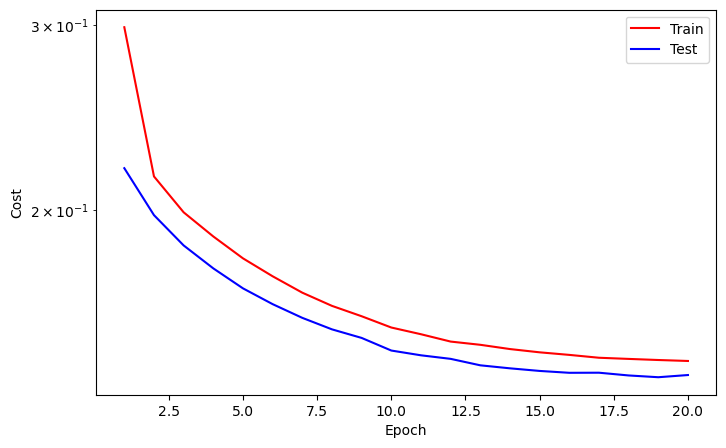

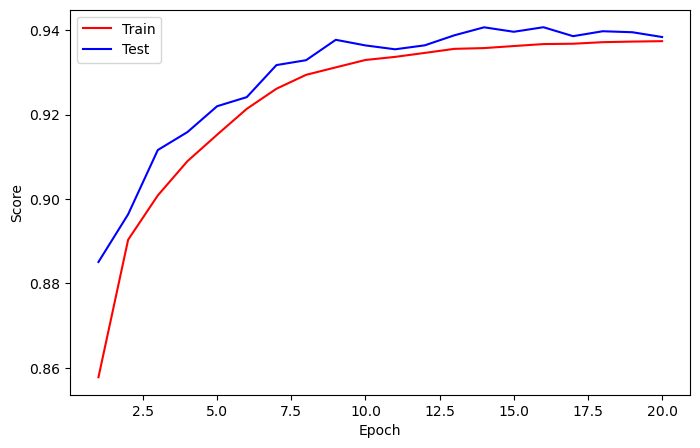

==> EarlyStop patience =  4 | Best test_score: 0.9407


test: 100%|██████████| 625/625 [00:00<00:00, 2150.86it/s]


           📊 Epoch Summary             Per-Label Accuracy 
┏━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━┳━━━━━━━━━━┓
┃ Metric           ┃  Train ┃   Test ┃ ┃ Label ┃ Accuracy ┃
┡━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━╇━━━━━━━━━━┩
│ Loss             │ 0.1437 │ 0.1386 │ │   1   │  0.9971  │
│ Hamming Loss     │ 0.0624 │ 0.0574 │ │   2   │  0.9454  │
│ Subset Accuracy  │ 0.8248 │ 0.8409 │ │   3   │  0.8688  │
│ Micro F1         │ 0.8423 │ 0.8548 │ │   4   │  0.9988  │
│ Macro F1         │ 0.4601 │ 0.4753 │ │   5   │  0.9027  │
│ Overall Accuracy │ 0.9376 │ 0.9426 │ └───────┴──────────┘
└──────────────────┴────────┴────────┘


Epoch    21
Train_cost  = 0.1437 | Test_cost  = 0.1386 | Train_score = 0.9376 | Test_score = 0.9426 |


test: 100%|██████████| 625/625 [00:00<00:00, 1733.06it/s]


           📊 Epoch Summary             Per-Label Accuracy 
┏━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━┳━━━━━━━━━━┓
┃ Metric           ┃  Train ┃   Test ┃ ┃ Label ┃ Accuracy ┃
┡━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━╇━━━━━━━━━━┩
│ Loss             │ 0.1434 │ 0.1394 │ │   1   │  0.9971  │
│ Hamming Loss     │ 0.0623 │ 0.0580 │ │   2   │  0.9450  │
│ Subset Accuracy  │ 0.8246 │ 0.8425 │ │   3   │  0.8667  │
│ Micro F1         │ 0.8426 │ 0.8545 │ │   4   │  0.9988  │
│ Macro F1         │ 0.4608 │ 0.4693 │ │   5   │  0.9024  │
│ Overall Accuracy │ 0.9377 │ 0.9420 │ └───────┴──────────┘
└──────────────────┴────────┴────────┘


Epoch    22
Train_cost  = 0.1434 | Test_cost  = 0.1394 | Train_score = 0.9377 | Test_score = 0.9420 |
==> EarlyStop patience =  1 | Best test_score: 0.9426


test: 100%|██████████| 625/625 [00:00<00:00, 1843.03it/s]


           📊 Epoch Summary             Per-Label Accuracy 
┏━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━┳━━━━━━━━━━┓
┃ Metric           ┃  Train ┃   Test ┃ ┃ Label ┃ Accuracy ┃
┡━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━╇━━━━━━━━━━┩
│ Loss             │ 0.1432 │ 0.1381 │ │   1   │  0.9971  │
│ Hamming Loss     │ 0.0623 │ 0.0571 │ │   2   │  0.9455  │
│ Subset Accuracy  │ 0.8252 │ 0.8416 │ │   3   │  0.8713  │
│ Micro F1         │ 0.8427 │ 0.8553 │ │   4   │  0.9988  │
│ Macro F1         │ 0.4603 │ 0.4767 │ │   5   │  0.9015  │
│ Overall Accuracy │ 0.9377 │ 0.9428 │ └───────┴──────────┘
└──────────────────┴────────┴────────┘


Epoch    23
Train_cost  = 0.1432 | Test_cost  = 0.1381 | Train_score = 0.9377 | Test_score = 0.9428 |


test: 100%|██████████| 625/625 [00:00<00:00, 1861.37it/s]


           📊 Epoch Summary             Per-Label Accuracy 
┏━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━┳━━━━━━━━━━┓
┃ Metric           ┃  Train ┃   Test ┃ ┃ Label ┃ Accuracy ┃
┡━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━╇━━━━━━━━━━┩
│ Loss             │ 0.1428 │ 0.1379 │ │   1   │  0.9971  │
│ Hamming Loss     │ 0.0618 │ 0.0582 │ │   2   │  0.9457  │
│ Subset Accuracy  │ 0.8262 │ 0.8391 │ │   3   │  0.8667  │
│ Micro F1         │ 0.8439 │ 0.8532 │ │   4   │  0.9988  │
│ Macro F1         │ 0.4627 │ 0.4741 │ │   5   │  0.9009  │
│ Overall Accuracy │ 0.9382 │ 0.9418 │ └───────┴──────────┘
└──────────────────┴────────┴────────┘


Epoch    24
Train_cost  = 0.1428 | Test_cost  = 0.1379 | Train_score = 0.9382 | Test_score = 0.9418 |
==> EarlyStop patience =  1 | Best test_score: 0.9428


test: 100%|██████████| 625/625 [00:00<00:00, 1724.70it/s]


           📊 Epoch Summary             Per-Label Accuracy 
┏━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━┳━━━━━━━━━━┓
┃ Metric           ┃  Train ┃   Test ┃ ┃ Label ┃ Accuracy ┃
┡━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━╇━━━━━━━━━━┩
│ Loss             │ 0.1430 │ 0.1381 │ │   1   │  0.9971  │
│ Hamming Loss     │ 0.0619 │ 0.0578 │ │   2   │  0.9453  │
│ Subset Accuracy  │ 0.8261 │ 0.8415 │ │   3   │  0.8670  │
│ Micro F1         │ 0.8437 │ 0.8544 │ │   4   │  0.9988  │
│ Macro F1         │ 0.4625 │ 0.4729 │ │   5   │  0.9028  │
│ Overall Accuracy │ 0.9381 │ 0.9422 │ └───────┴──────────┘
└──────────────────┴────────┴────────┘


Epoch    25
Train_cost  = 0.1430 | Test_cost  = 0.1381 | Train_score = 0.9381 | Test_score = 0.9422 |
==> EarlyStop patience =  2 | Best test_score: 0.9428


test: 100%|██████████| 625/625 [00:00<00:00, 1862.41it/s]


           📊 Epoch Summary             Per-Label Accuracy 
┏━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━┳━━━━━━━━━━┓
┃ Metric           ┃  Train ┃   Test ┃ ┃ Label ┃ Accuracy ┃
┡━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━╇━━━━━━━━━━┩
│ Loss             │ 0.1430 │ 0.1378 │ │   1   │  0.9971  │
│ Hamming Loss     │ 0.0620 │ 0.0592 │ │   2   │  0.9451  │
│ Subset Accuracy  │ 0.8254 │ 0.8373 │ │   3   │  0.8635  │
│ Micro F1         │ 0.8435 │ 0.8509 │ │   4   │  0.9988  │
│ Macro F1         │ 0.4624 │ 0.4717 │ │   5   │  0.8995  │
│ Overall Accuracy │ 0.9380 │ 0.9408 │ └───────┴──────────┘
└──────────────────┴────────┴────────┘


Epoch    26
Train_cost  = 0.1430 | Test_cost  = 0.1378 | Train_score = 0.9380 | Test_score = 0.9408 |
==> EarlyStop patience =  3 | Best test_score: 0.9428


test: 100%|██████████| 625/625 [00:00<00:00, 2192.05it/s]


           📊 Epoch Summary             Per-Label Accuracy 
┏━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━┳━━━━━━━━━━┓
┃ Metric           ┃  Train ┃   Test ┃ ┃ Label ┃ Accuracy ┃
┡━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━╇━━━━━━━━━━┩
│ Loss             │ 0.1424 │ 0.1382 │ │   1   │  0.9971  │
│ Hamming Loss     │ 0.0617 │ 0.0611 │ │   2   │  0.9447  │
│ Subset Accuracy  │ 0.8253 │ 0.8299 │ │   3   │  0.8599  │
│ Micro F1         │ 0.8443 │ 0.8454 │ │   4   │  0.9988  │
│ Macro F1         │ 0.4633 │ 0.4639 │ │   5   │  0.8941  │
│ Overall Accuracy │ 0.9383 │ 0.9389 │ └───────┴──────────┘
└──────────────────┴────────┴────────┘


Epoch    27
Train_cost  = 0.1424 | Test_cost  = 0.1382 | Train_score = 0.9383 | Test_score = 0.9389 |
==> EarlyStop patience =  4 | Best test_score: 0.9428


test: 100%|██████████| 625/625 [00:00<00:00, 2024.15it/s]


           📊 Epoch Summary             Per-Label Accuracy 
┏━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━┳━━━━━━━━━━┓
┃ Metric           ┃  Train ┃   Test ┃ ┃ Label ┃ Accuracy ┃
┡━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━╇━━━━━━━━━━┩
│ Loss             │ 0.1425 │ 0.1378 │ │   1   │  0.9971  │
│ Hamming Loss     │ 0.0621 │ 0.0608 │ │   2   │  0.9454  │
│ Subset Accuracy  │ 0.8245 │ 0.8321 │ │   3   │  0.8596  │
│ Micro F1         │ 0.8433 │ 0.8461 │ │   4   │  0.9988  │
│ Macro F1         │ 0.4614 │ 0.4658 │ │   5   │  0.8951  │
│ Overall Accuracy │ 0.9379 │ 0.9392 │ └───────┴──────────┘
└──────────────────┴────────┴────────┘


Epoch    28
Train_cost  = 0.1425 | Test_cost  = 0.1378 | Train_score = 0.9379 | Test_score = 0.9392 |
==> EarlyStop patience =  5 | Best test_score: 0.9428
==> Execute Early Stopping at epoch: 28 | Best test_score: 0.9428
==> Best model is saved at multi-label-clasification/one-d/


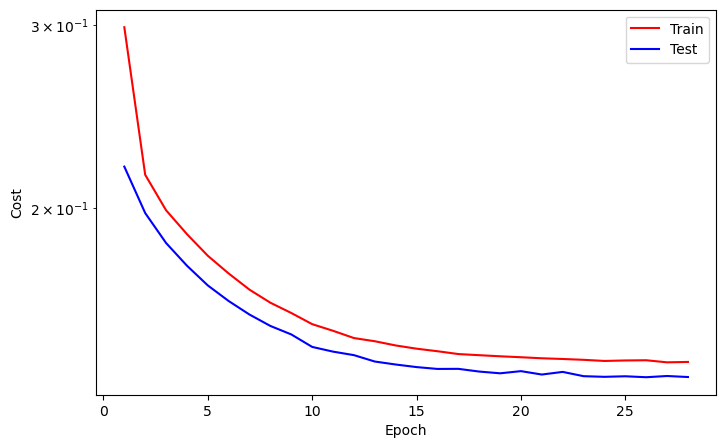

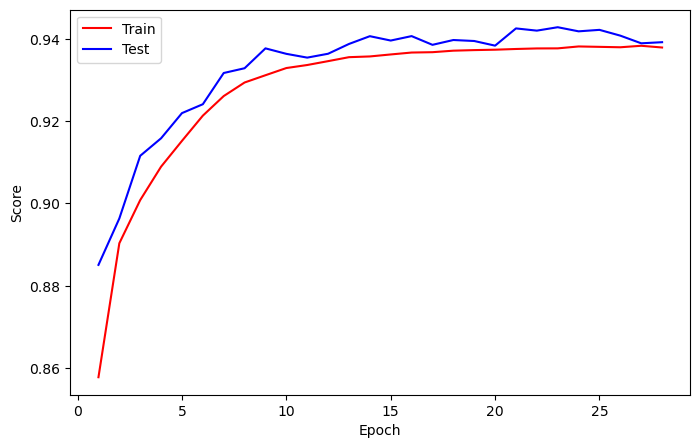

In [107]:
import looper as lp

from rich.console import Console
from rich.table import Table
from rich.columns import Columns

console = Console()

while True:
    # === Training ===
    train_metrics = lp.loop_multi_label_classification_1D(
        "train", train_dataset, train_loader, model, criterion, optim, device, config.threshold
    )

    # === Testing ===
    with torch.no_grad():
        test_metrics = lp.loop_multi_label_classification_1D(
            "test", test_dataset, test_loader, model, criterion, optim, device, config.threshold
        )

    # === Buat tabel utama (Epoch Summary) ===
    table_summary = Table(title="📊 Epoch Summary", title_style="bold magenta")
    table_summary.add_column("Metric", justify="left", style="cyan", no_wrap=True)
    table_summary.add_column("Train", justify="right", style="green")
    table_summary.add_column("Test", justify="right", style="yellow")

    metrics_keys = ["loss", "hamming_loss", "subset_accuracy", "micro_f1", "macro_f1", "overall_accuracy"]

    for key in metrics_keys:
        table_summary.add_row(
            key.replace("_", " ").title(),
            f"{train_metrics[key]:.4f}",
            f"{test_metrics[key]:.4f}"
        )

    # === Buat tabel per-label accuracy ===
    table_label = Table(title="Per-Label Accuracy", title_style="bold blue")
    table_label.add_column("Label", justify="center", style="cyan", no_wrap=True)
    table_label.add_column("Accuracy", justify="center", style="green")

    for i, acc in enumerate(test_metrics["per_label_accuracy"]):
        table_label.add_row(str(i + 1), f"{acc:.4f}")

    # === Cetak berdampingan (kiri-kanan) ===
    console.print(Columns([table_summary, table_label]))

    # === Logging & Early Stopping ===
    train_cost, train_acc = train_metrics['loss'], train_metrics['overall_accuracy']
    test_cost, test_acc = test_metrics['loss'], test_metrics['overall_accuracy']

    callback.log(train_cost, test_cost, train_acc, test_acc)
    callback.save_checkpoint()
    callback.cost_runtime_plotting()
    callback.score_runtime_plotting()

    if callback.early_stopping(model, monitor="test_score"):
        callback.plot_cost()
        callback.plot_score()
        break

